# Работа 1.6. Измерение модуля Юнга методом акустического резонанса

**Цель работы**: исследование явления акустического резонанса. Измерение скорости
распространения продольных колебаний в тонких стрежнях. Измерение модуля
Юнга различных материалов.

**В работе используются**: генератор звуковых частот, частотомер, осциллограф,
электромагнитные излучатель и приемник колебаний, набор стержней из различных материалов (стали, дюраля, меди)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Теоретические формулы**
$$c_{ст} = \frac{2Lf_n}{n}$$
$$E = \rho c_{ст}$$

Здесь $c_{ст}$ - скорость распространения бегущих волн, $L$ - длина стержня, $f_n$ - частота $n$-го резонанса, $\rho$ - плотность стержня, $E$ - модуль Юнга.

**Построение графика**

In [2]:
data = pd.read_excel('lab-1-6.xlsx', 'table-1')
data.head(len(data))

,Материал,n,"fₙ, Гц","L, м","с, м/с","ρ, кг/м³","E, 10¹¹ Н/м²"
0,Медь,1,3221,0.6,3865.2,8900,1.330
1,Медь,3,9655,0.6,3862.0,8900,1.327
2,Сталь,1,4132,0.6,4958.4,7800,1.918
3,Сталь,3,12383,0.6,4953.2,7800,1.914
4,Дюраль,1,4245,0.6,5094.0,2700,0.701
5,Дюраль,3,12709,0.6,5083.6,2700,0.698


In [3]:
pogr = pd.read_excel('lab-1-6.xlsx', 'table-2')
pogr.head(len(pogr))

,Материал,n,"Δfₙ, Гц","ΔL, м","Δс, м/с","Δρ, кг/м³","ΔE, 10¹¹ Н/м²"
0,Медь,1,5,0.0005,9.221000,5,0.003920
1,Медь,3,5,0.0005,5.218333,5,0.002539
2,Сталь,1,5,0.0005,10.132000,5,0.005149
3,Сталь,3,5,0.0005,6.127667,5,0.003595
4,Дюраль,1,5,0.0005,10.245000,5,0.002708
5,Дюраль,3,10,0.0005,8.236333,5,0.002423


In [4]:
y = data.values[:, 2]

In [5]:
dy = pogr.values[:, 2]

In [6]:
k1, b1 = np.polyfit([1, 3], y[:2], deg=1)
k2, b2 = np.polyfit([1, 3], y[2:4], deg=1)
k3, b3 = np.polyfit([1, 3], y[4:], deg=1)

In [7]:
grid = np.linspace(0.0, 3.0, 300)

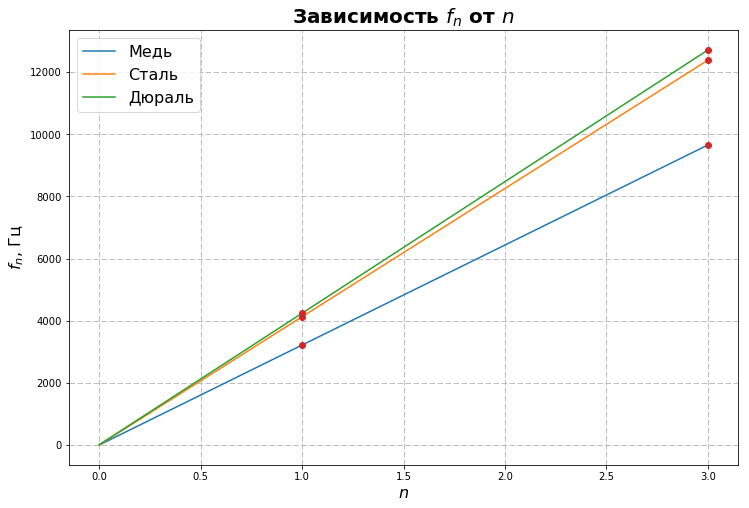

In [8]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='--')

plt.title('Зависимость $f_n$ от $n$', fontweight='bold', fontsize=20)
plt.xlabel('$n$', fontsize=16)
plt.ylabel('$f_n$, Гц', fontsize=16)

plt.plot(grid, k1 * grid + b1, label='Медь')
plt.plot(grid, k2 * grid + b2, label='Сталь')
plt.plot(grid, k3 * grid + b3, label='Дюраль')
plt.errorbar([1, 3, 1, 3, 1, 3], y, yerr=dy, fmt='o')

plt.legend(fontsize=16)

plt.show()

**Вычисление добротности**

Для дюрали мы получили $\Delta\omega = 4275 - 4245 = 30$ кГц, тогда добротность равна
$$Q = \frac{f_1}{\Delta\omega} = 142.$$ 